<a href="https://colab.research.google.com/github/kaivalyagnik/ml-practice-portfolio/blob/main/insurance_charges_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


In [41]:
insurance_data = pd.read_csv(path + "/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-42-1319775443>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(insurance_data, x='age', y='smoker', inner='box', palette='Dark2')


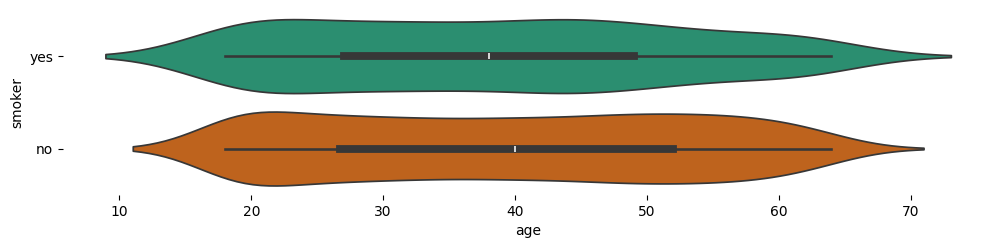

In [42]:
# @title smoker vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(insurance_data['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(insurance_data, x='age', y='smoker', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

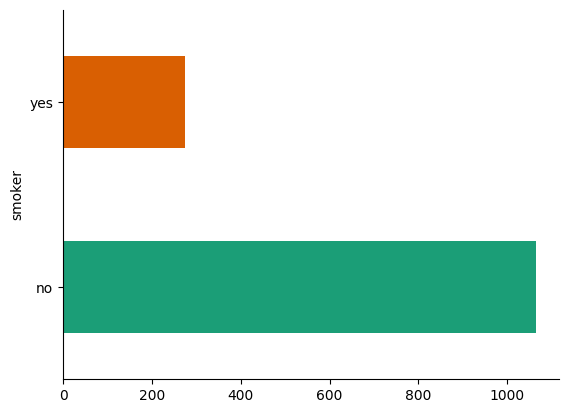

In [43]:
# @title smoker

from matplotlib import pyplot as plt
import seaborn as sns
insurance_data.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
# getting the metadata
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
# selecting the target column to get input and output features separately
X = insurance_data.drop('charges', axis = 1)
y = insurance_data['charges']

In [46]:
# splitting the data into two parts: (80 % of the data for training and the remaining 20 % for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# separating the numerical and categorical columns
num_cols = X.select_dtypes(include = [np.number]).columns.to_list()
cat_cols = X.select_dtypes(include = 'object').columns.to_list()

In [48]:
# importing all the necessary libraries

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

In [49]:
# function to evaluate the scores of a model
def evaluate_model(model, name):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  rmse = root_mean_squared_error(y_test, preds)
  r2score = r2_score(y_test, preds)
  return f"{name} → RMSE: {rmse:.2f}, R² score: {r2score:.3f}."


# all the required pipelines with different regressor models
ordinal_preprocessor = ColumnTransformer([("num", StandardScaler(), num_cols), ("cat", OrdinalEncoder(), cat_cols)])

ordinal_linear_reg_model = make_pipeline(ordinal_preprocessor, LinearRegression())

one_hot_preprocessor = ColumnTransformer([("num", StandardScaler(), num_cols), ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)])

one_hot_linear_reg_model = make_pipeline(one_hot_preprocessor, LinearRegression())

evaluate_model(ordinal_linear_reg_model, "ordinal encoder (linear regression)")

'ordinal encoder (linear regression) → RMSE: 5799.59, R² score: 0.783.'

In [50]:
evaluate_model(one_hot_linear_reg_model, "one hot encoder (linear regression)")

'one hot encoder (linear regression) → RMSE: 5796.28, R² score: 0.784.'

In [51]:
# ordinal encoding with decision tree regressor
ordinal_tree_pipeline = make_pipeline(
    ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OrdinalEncoder(), cat_cols)
    ]),
    DecisionTreeRegressor(random_state=42)
)

# one hot encoding with decision tree regressor
onehot_tree_pipeline = make_pipeline(
    ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]),
    DecisionTreeRegressor(random_state=42)
)

# ordinal encoding with random forest regressor
ordinal_forest_pipeline = make_pipeline(
    ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OrdinalEncoder(), cat_cols)
    ]),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# one hot encoding with random forest regressor
onehot_forest_pipeline = make_pipeline(
    ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

# ordinal encoding with xgboost regressor
ordinal_xgb_pipeline = make_pipeline(
    ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OrdinalEncoder(), cat_cols)
    ]),
    XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
)

# One-Hot Encoding + XGBoost
onehot_xgb_pipeline = make_pipeline(
    ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]),
    XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
)

In [52]:
evaluate_model(onehot_tree_pipeline, "one hot encoder (decision trees)")

'one hot encoder (decision trees) → RMSE: 6162.92, R² score: 0.755.'

In [53]:
evaluate_model(ordinal_tree_pipeline, "ordinal encoder (decision trees)")

'ordinal encoder (decision trees) → RMSE: 7000.15, R² score: 0.684.'

In [54]:
evaluate_model(ordinal_forest_pipeline, "ordinal encoder (random forests)")

'ordinal encoder (random forests) → RMSE: 4591.37, R² score: 0.864.'

In [55]:
evaluate_model(onehot_forest_pipeline, "one hot encoder (random forests)")

'one hot encoder (random forests) → RMSE: 4588.23, R² score: 0.864.'

In [56]:
evaluate_model(ordinal_xgb_pipeline, "ordinal encoder (xgboost)")

'ordinal encoder (xgboost) → RMSE: 4819.85, R² score: 0.850.'

In [57]:
evaluate_model(onehot_xgb_pipeline, "one hot encoder (xgboost)")

'one hot encoder (xgboost) → RMSE: 4738.61, R² score: 0.855.'

In [58]:
import joblib

joblib.dump(onehot_forest_pipeline, "insurance_charges_predictor.job")

['insurance_charges_predictor.job']